Тест работы

In [7]:
from time import time
print(time())

1621527834.392577


In [8]:
from ipyfilechooser import FileChooser
import os
from IPython.display import display

# Create new FileChooser:
# Path: current directory
# File: test.txt
# Title: <b>FileChooser example</b>
# Show hidden files: no
# Use the default path and filename as selection: yes
# Use folder icons: yes
# Only show folders: no
fc = FileChooser(
    # os.getcwd(),
    # filename='test.txt',
    title='<b>FileChooser example</b>',
    show_hidden=False,
    # select_default=True,
    use_dir_icons=True
    # show_only_dirs=True
)

display(fc)

FileChooser(path='/home/dura/my/surinet/test', filename='', title='HTML(value='<b>FileChooser example</b>')', …

In [9]:
print(fc.selected_path)
print(fc.selected_filename)
print(fc.selected)

None
None
None


In [10]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt

image = cv2.imread('test/test.png')
image_resize = cv2.resize(image, (160, 90))
# cv2.imshow("test", image_resize)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

error: OpenCV(4.5.2) /tmp/pip-req-build-eirhwqtr/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


Тест производительности

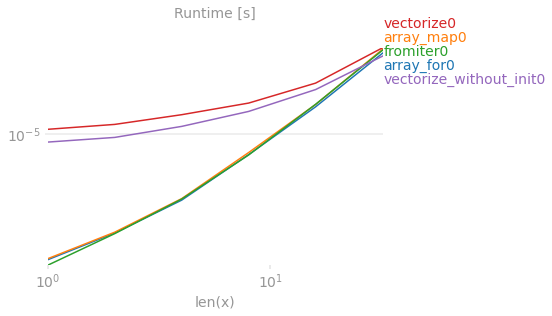

In [ ]:
%matplotlib inline

import numpy as np
import perfplot
import math


def f0(x):
    # return math.sqrt(x)
    return np.sqrt(x)


vf0 = np.vectorize(f0)


def array_for0(x):
    return np.array([f0(xi) for xi in x])


def array_map0(x):
    return np.array(list(map(f0, x)))


def fromiter0(x):
    return np.fromiter((f0(xi) for xi in x), x.dtype)


def vectorize0(x):
    return np.vectorize(f0)(x)


def vectorize_without_init0(x):
    return vf0(x)


perfplot.show(
    setup=lambda n: np.random.rand(n),
    n_range=[2 ** k for k in range(10)],
    kernels=[array_for0, array_map0,
             fromiter0, vectorize0, vectorize_without_init0
             ],
    xlabel="len(x)",
)

Тест производительности 2

In [ ]:
%matplotlib inline

import perfplot

# numpy-functionality
def f(x):
    return x+2*x*x+4*x*x*x

# python-function as ufunc
import numpy as np
vf=np.vectorize(f)
vf.__name__="vf"

# less cache misses than numpy-functionality
# import numexpr as ne
# def ne_f(x):
#     return ne.evaluate("x+2*x*x+4*x*x*x")

# runtime generated C-function as ufunc
import numba as nb
@nb.vectorize(target="cpu")
def nb_vf(x):
    return x+2*x*x+4*x*x*x

@nb.njit(parallel=True)
def nb_par_jitf(x):
    y=np.empty(x.shape)
    for i in nb.prange(len(x)):
        y[i]=x[i]+2*x[i]*x[i]+4*x[i]*x[i]*x[i]
    return y

perfplot.show(
    setup=lambda n: np.random.rand(n),
    n_range=[2**k for k in range(24)], # max - 27
    kernels=[
        # f,
        # vf,
        # ne_f,
        nb_vf, nb_par_jitf,
        ],
    logx=True,
    logy=True,
    xlabel='len(x)'
    )

In [ ]:
def f2(x):
    return x+2*x*x+4*x*x*x

%timeit f2(2)  # ждем

МОИ ТЕСТЫ

In [ ]:
%matplotlib inline

import perfplot
import numpy as np
import numba as nb

def test0_bloom_filter(big_arr: np.ndarray):
    in_arr = big_arr[0]
    arr_2d = big_arr

    count_i, count_j = arr_2d.shape
    y=np.empty(count_i)
    yy=np.empty(count_j)
    for i in range(count_i):
        for j in range(count_j):
            yy[j] = min(in_arr[j], arr_2d[i][j])
        y[i] = np.sum(yy)
    return y

@nb.njit()
def test1_cpu_bloom_filter(big_arr: np.ndarray):
    in_arr = big_arr[0]
    arr_2d = big_arr

    count_i, count_j = arr_2d.shape
    y=np.empty(count_i)
    yy=np.empty(count_j)
    for i in nb.prange(count_i):
        for j in nb.prange(count_j):
            yy[j] = min(in_arr[j], arr_2d[i][j])
        y[i] = np.sum(yy)
    return y

@nb.njit(parallel=True)
def test1_par_bloom_filter(big_arr: np.ndarray):
    in_arr = big_arr[0]
    arr_2d = big_arr

    count_i, count_j = arr_2d.shape
    y=np.empty(count_i)
    yy=np.empty(count_j)
    for i in nb.prange(count_i):
        for j in nb.prange(count_j):
            yy[j] = min(in_arr[j], arr_2d[i][j])
        y[i] = np.sum(yy)
    return y


@nb.vectorize()
def x_and_y_to_z(x, y):
    return min(x, y)

@nb.njit(parallel=True)
def test1_opt_par_bloom_filter(big_arr: np.ndarray):
    in_arr = big_arr[0]
    arr_2d = big_arr

    count_i, count_j = arr_2d.shape
    y=np.empty(count_i)
    # yy=np.empty(count_j)
    for i in nb.prange(count_i):
        # for j in nb.prange(count_j):
        #     yy[j] = min(in_arr[j], arr_2d[i][j])
        y[i] = np.sum(x_and_y_to_z(in_arr, arr_2d[i]))
    return y

@nb.njit()
def test2_cpu_bloom_filter(big_arr: np.ndarray):
    in_arr = big_arr[0]
    arr_2d = big_arr

    count_i, count_j = arr_2d.shape
    y=np.empty(count_i)
    for i in range(count_i):
        y[i] = np.sum(in_arr*big_arr[i])
    return y

@nb.njit(parallel=True)
def test2_par_bloom_filter(big_arr: np.ndarray):
    in_arr = big_arr[0]
    arr_2d = big_arr

    count_i, count_j = arr_2d.shape
    y=np.empty(count_i)
    for i in nb.prange(count_i):
        y[i] = np.sum(in_arr*big_arr[i])
    return y


perfplot.show(
    setup=lambda n: np.random.rand(100, n),
    n_range=[2**k for k in range(15)], # max - 10
    kernels=[
        # test0_bloom_filter,
        test1_cpu_bloom_filter, test1_par_bloom_filter, test1_opt_par_bloom_filter,
    ],
    logx=True,
    logy=True,
    xlabel="len(x)"
    )

perfplot.show(
    setup=lambda n: np.random.rand(100, n),
    n_range=[2**k for k in range(15)], # max - 10
    kernels=[
        # test0_bloom_filter,
        test2_cpu_bloom_filter, test2_par_bloom_filter
    ],
    logx=True,
    logy=True,
    xlabel="len(x)"
    )

In [ ]:
%matplotlib inline

import perfplot
import numpy as np
import numba as nb


@nb.njit()
def bloom_test_cpu(big_arr):
    in_arr = big_arr[0]
    arr_2d = big_arr
    arr_neuron = big_arr[-1]

    count_i, count_j = arr_2d.shape
    y=np.empty(count_i, dtype=np.bool_)
    for i in range(count_i):
        y[i] = np.sum(in_arr * arr_2d[i]) > 0.5 * np.sum(arr_2d[i])
    return np.sum(y * arr_neuron)

@nb.njit(parallel=True)
def bloom_test_par(big_arr):
    in_arr = big_arr[0]
    arr_2d = big_arr
    arr_neuron = big_arr[-1]

    count_i, count_j = arr_2d.shape
    y=np.empty(count_i, dtype=np.bool_)
    for i in nb.prange(count_i):
        y[i] = np.sum(in_arr * arr_2d[i]) > 0.5 * np.sum(arr_2d[i])
    return np.sum(y * arr_neuron)

@nb.njit(parallel=True)
def bloom_test_par2(big_arr):
    in_arr = big_arr[0]
    arr_2d = big_arr
    arr_neuron = big_arr[-1]

    count_i, count_j = arr_2d.shape
    summa = 0
    for i in nb.prange(count_i):
        summa += (np.sum(in_arr * arr_2d[i]) > 0.5 * np.sum(arr_2d[i])) * arr_neuron[i]
    return summa

@nb.njit(parallel=True, fastmath=True)
def bloom_test_par_opt(big_arr):
    in_arr = big_arr[0]
    arr_2d = big_arr
    arr_neuron = big_arr[-1]

    count_i, count_j = arr_2d.shape
    y=np.empty(count_i, dtype=np.bool_)
    for i in nb.prange(count_i):
        y[i] = np.sum(in_arr * arr_2d[i]) > 0.5 * np.sum(arr_2d[i])
    return np.sum(y * arr_neuron)

perfplot.show(
    setup=lambda n: np.random.rand(n, n),
    n_range=[2**k for k in range(10)], # max - 10
    kernels=[
        bloom_test_cpu, bloom_test_par,
        # bloom_test_par2,
        bloom_test_par_opt
    ],
    logx=True,
    logy=True,
    xlabel="len(x)"
    )
